## What is this notebook for?

This scripts it to test:
- the reshaping of the 3d array
- test of histogram creation
- test of histogram comparison

#### Import libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from function_reshape_array import reshape_array as ra

### create the first array and reshape it

In [87]:
# create a 3d array
arr_big_1 = np.random.rand(91, 109, 91)
print(f"flattened length of big array: {len(arr_big_1.flatten())}",
      f"shape of big array: {arr_big_1.shape}",)

# reshape the array
reshape_factor = 5
arr_small_1 = ra(arr_big_1, (reshape_factor, reshape_factor, reshape_factor))
print(f"flattened length of small array: {len(arr_small_1.flatten())}",
      f"shape of small array: {arr_small_1.shape}",
      f"factor of reduction: {len(arr_big_1.flatten()) / len(arr_small_1.flatten())}")

flattened length of big array: 902629 shape of big array: (91, 109, 91)
flattened length of small array: 7581 shape of small array: (19, 21, 19) factor of reduction: 119.0646352723915


#### plot the array

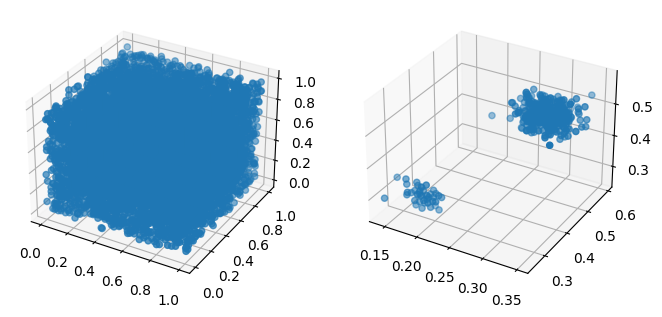

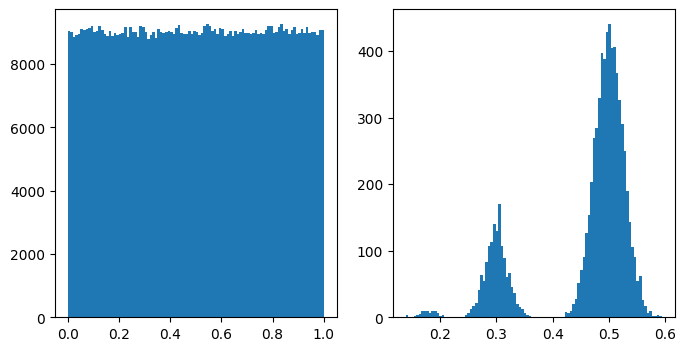

In [88]:
# 3d subplot with big and small array next to each other
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(arr_big_1[:, :, 0], arr_big_1[:, :, 1], arr_big_1[:, :, 2])
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(arr_small_1[:, :, 0], arr_small_1[:, :, 1], arr_small_1[:, :, 2])
plt.show()

# plot histogram of big and small array
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.hist(arr_big_1.flatten(), bins=100)
ax2 = fig.add_subplot(122)
ax2.hist(arr_small_1.flatten(), bins=100)
plt.show()

#### create an entire list of arrays

the shape should be the following (sample, x, y, z)


<function matplotlib.pyplot.show(close=None, block=None)>

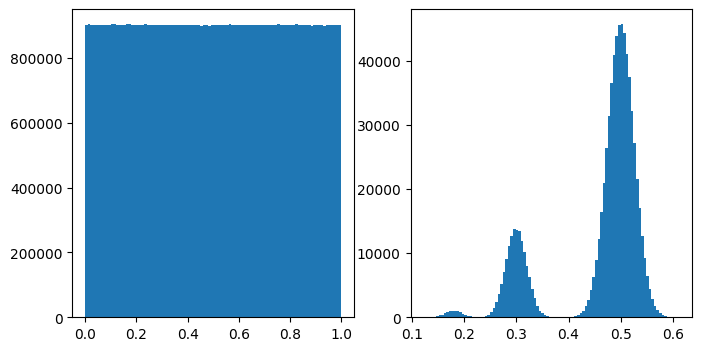

In [89]:
# create an entire list of arrays
# the shape should be the following (sample, x, y, z) = (100, 91, 109, 91)
arr_big = np.random.rand(100, 91, 109, 91)

# reshape the list of arrays
arr_small = np.array([reshape_array(arr_big[i], (reshape_factor, reshape_factor, reshape_factor)) 
                        for i in range(arr_big.shape[0])])

# plot histogram of big and small arr
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.hist(arr_big.flatten(), bins=100)
ax2 = fig.add_subplot(122)
ax2.hist(arr_small.flatten(), bins=100)
plt.show

In [90]:
arr_small.shape

(100, 19, 21, 19)

#### ground truth array

In [91]:
# array which represents the ground truth with 0 and 1
np.random.seed(0)
arr_gt = np.random.rand(100)
arr_gt[arr_gt < 0.5] = 0
arr_gt[arr_gt >= 0.5] = 1

# count the number of 0 and 1 in the ground truth
print(f"number of 0: {np.count_nonzero(arr_gt == 0)}",
      f"number of 1: {np.count_nonzero(arr_gt == 1)}")

# change some elements of the arr_small to bigger values if the corresponding element in the arr_gt is 1
# arr_small[arr_gt == 1] = arr_small[arr_gt == 1] * 1.1

number of 0: 51 number of 1: 49


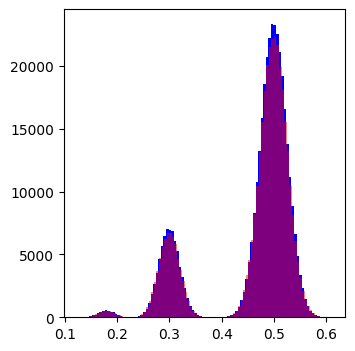

In [92]:
# plot histogram of arr_small, colors are different for 0 and 1
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.hist(arr_small[arr_gt == 0].flatten(), bins=100, color='blue')
ax.hist(arr_small[arr_gt == 1].flatten(), bins=100, color='red', alpha=0.5)
plt.show()

### manipulate data

In [93]:
# flatten the arr_small into a 2d array (keep the sample dimension)
arr_small_2d = arr_small.reshape(arr_small.shape[0], -1)
print(f"shape of arr_small_2d: {arr_small_2d.shape}")

shape of arr_small_2d: (100, 7581)


In [94]:
# create a histogram along the sample dimension 
df_small = (pd.DataFrame(arr_small_2d)
            # add a column "ground_truth" as categorical which contains the ground truth
            .assign(ground_truth=pd.Categorical(arr_gt))
            )
# df_small.hist(bins=100, figsize=(8, 4))
df_small

,0,1,2,3,4,5,6,7,8,9,...,7572,7573,7574,7575,7576,7577,7578,7579,7580,ground_truth
0,0.192238,0.275817,0.296834,0.272348,0.323284,0.315443,0.321196,0.304034,0.307719,0.291890,...,0.291682,0.291901,0.286277,0.323343,0.309941,0.303842,0.337229,0.277831,0.205343,1.0
1,0.172324,0.311483,0.300216,0.315296,0.291180,0.310123,0.272382,0.310841,0.309900,0.318774,...,0.263873,0.302805,0.305680,0.284358,0.308494,0.310429,0.300652,0.308928,0.177009,1.0
2,0.175211,0.295597,0.293537,0.343654,0.307676,0.296926,0.283756,0.293405,0.285268,0.299463,...,0.329685,0.289059,0.280802,0.326618,0.287490,0.292868,0.327826,0.295915,0.169373,1.0
3,0.168515,0.301880,0.273694,0.277981,0.307741,0.289094,0.303825,0.307315,0.283951,0.316730,...,0.318144,0.305068,0.281227,0.324354,0.303408,0.307651,0.306245,0.291451,0.170515,1.0
4,0.169311,0.248616,0.316546,0.303761,0.279447,0.300148,0.294699,0.279572,0.314412,0.276163,...,0.309703,0.314842,0.299456,0.299034,0.265456,0.298556,0.247472,0.316870,0.191161,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.153839,0.301544,0.311031,0.299145,0.268105,0.326637,0.302431,0.313540,0.265526,0.283430,...,0.290973,0.275781,0.302875,0.306811,0.282933,0.256572,0.298506,0.290264,0.170301,0.0
96,0.176404,0.324463,0.282761,0.281116,0.283225,0.289532,0.330464,0.241395,0.316524,0.288855,...,0.321818,0.322636,0.339699,0.291803,0.294946,0.259542,0.322354,0.333311,0.165989,1.0
97,0.174401,0.275546,0.328390,0.298629,0.305689,0.306144,0.282695,0.263580,0.308716,0.279746,...,0.272319,0.292912,0.283971,0.339591,0.298797,0.308841,0.287831,0.298476,0.172455,0.0
98,0.150647,0.302108,0.305615,0.316716,0.307587,0.310353,0.283542,0.278710,0.261442,0.269255,...,0.323117,0.313944,0.276244,0.302796,0.314843,0.300936,0.252360,0.308439,0.172242,1.0


<Axes: >

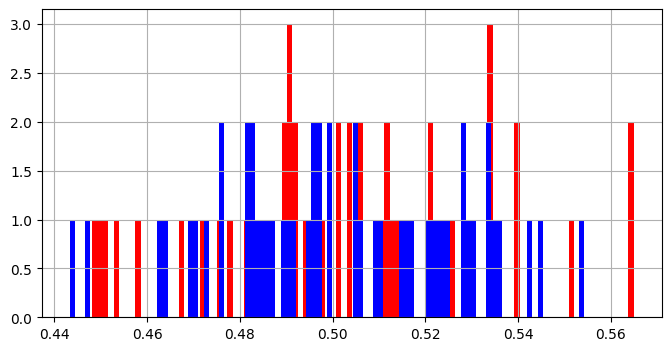

In [95]:
# create histogram for one column
col_nr = 490
df_small.loc[df_small["ground_truth"]==1 , col_nr].hist(bins=100, figsize=(8, 4), color='red')
df_small.loc[df_small["ground_truth"]==0 , col_nr].hist(bins=100, figsize=(8, 4), color='blue')


In [129]:
changed_col = [col_nr, col_nr * 2, col_nr * 3]
df_small.loc[df_small["ground_truth"]==1 , changed_col] *= 1.2

<Axes: >

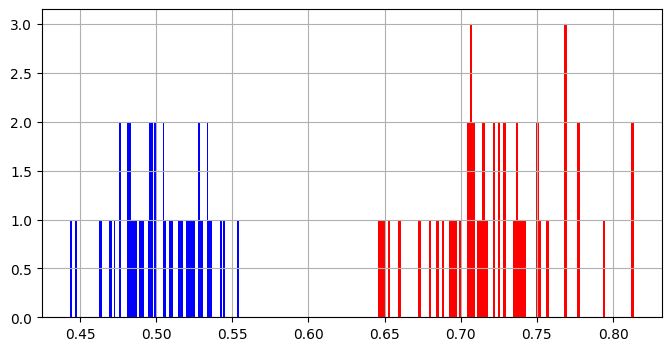

In [130]:
# create histogram for one column
col_nr = 490
df_small.loc[df_small["ground_truth"]==1 , col_nr].hist(bins=100, figsize=(8, 4), color='red')
df_small.loc[df_small["ground_truth"]==0 , col_nr].hist(bins=100, figsize=(8, 4), color='blue')


In [131]:
# calculate difference between the two histograms
diff = np.abs(df_small.loc[df_small["ground_truth"]==1 , col_nr].mean() 
              - df_small.loc[df_small["ground_truth"]==0 , col_nr].mean())
print(f"difference between the two histograms: {diff}")

difference between the two histograms: 0.2196385323988992


column number = 490, difference = 0.2196385323988992
column number = 1470, difference = 0.09923658883918607
column number = 980, difference = 0.09689740129336932
column number = 6035, difference = 0.02176447289049055
column number = 2866, difference = 0.019432439406896374
column number = 1547, difference = 0.018654871671730244
column number = 1578, difference = 0.017700736259358973
column number = 3138, difference = 0.01742013403303122
column number = 2391, difference = 0.017317635950243604
column number = 2828, difference = 0.017103952383332066


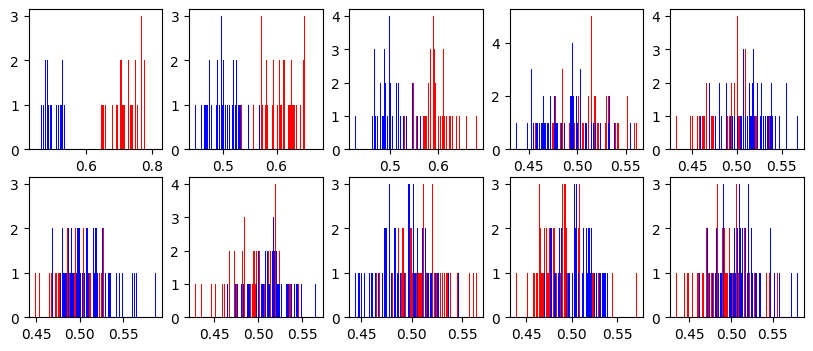

In [132]:
# find the 10 columns with the biggest difference
diff_dict = {}
for col in range(df_small.shape[1] - 1):  # -1 because the last column is the ground truth
    diff = np.abs(df_small.loc[df_small["ground_truth"]==1 , col].mean() 
                  - df_small.loc[df_small["ground_truth"]==0 , col].mean())
    diff_dict[col] = diff
diff_dict = sorted(diff_dict.items(), key=lambda x:x[1], reverse=True)  # creates a list of tuples

# print the first 10 pairs of the diff_dict
for i in range(10):
    print(f"column number = {diff_dict[i][0]}, difference = {diff_dict[i][1]}")

# plot the 10 columns with the biggest difference
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    col = diff_dict[i][0]
    ax = fig.add_subplot(2, 5, i+1)
    ax.hist(df_small.loc[df_small["ground_truth"]==1 , col], bins=100, color='red')
    ax.hist(df_small.loc[df_small["ground_truth"]==0 , col], bins=100, color='blue')


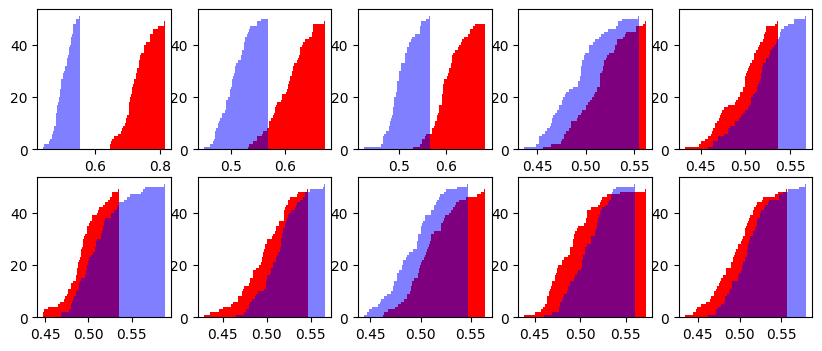

In [134]:
# create a cumulative histogram
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    col = diff_dict[i][0]
    ax = fig.add_subplot(2, 5, i+1)
    ax.hist(df_small.loc[df_small["ground_truth"]==1 , col], bins=100, color='red', cumulative=True)
    ax.hist(df_small.loc[df_small["ground_truth"]==0 , col], bins=100, color='blue', cumulative=True, alpha=0.5)